In [1]:
print("Hello There!")

Hello There!


In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
import PIL

In [5]:
import os

In [6]:
url = "http://download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos',origin=url,cache_dir='.',untar=True)

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'),
 PosixPath('datasets/flower_photos/roses/14414117598_cf70df30de.jpg'),
 PosixPath('datasets/flower_photos/roses/8562144481_1d629848ff.jpg'),
 PosixPath('datasets/flower_photos/roses/8096324039_4db2555490.jpg'),
 PosixPath('datasets/flower_photos/roses/17700322054_1c4fdaa034_m.jpg')]

In [9]:
img_count = len(list(data_dir.glob('*/*.jpg')))
img_count

3670

In [10]:
len(list(data_dir.glob('roses/*')))

641

In [11]:
flower_dict = {
    "roses":list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
}

flower_values = {
    "roses":0,
    'daisy':1,
    'sunflowers':2,
    'tulips':3,
    'dandelion':4,
}

In [12]:
flower_clases = [
    "roses",
    'daisy',
    'sunflowers',
    'tulips',
    'dandelion'
]

In [13]:
flower_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'),
 PosixPath('datasets/flower_photos/roses/14414117598_cf70df30de.jpg'),
 PosixPath('datasets/flower_photos/roses/8562144481_1d629848ff.jpg'),
 PosixPath('datasets/flower_photos/roses/8096324039_4db2555490.jpg'),
 PosixPath('datasets/flower_photos/roses/17700322054_1c4fdaa034_m.jpg')]

In [14]:
# Lets build our dataset
X = []
y = []

for names , images  in flower_dict.items():
  for img in images:
    new_img = cv2.imread(str(img))
    resized_img = cv2.resize(new_img,(180,180))
    X.append(resized_img)
    y.append(flower_values[names])

In [15]:
len(X)

3670

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
X.shape

(3670, 180, 180, 3)

(-0.5, 179.5, 179.5, -0.5)

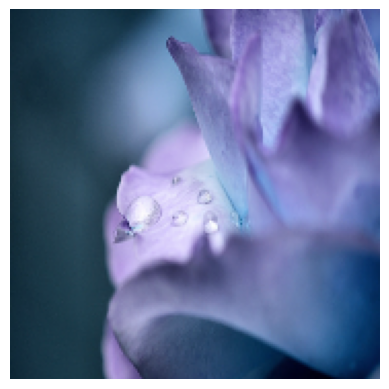

In [18]:
plt.imshow(X[1])
plt.axis('off')

In [19]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
# Now lets first scale our model for better performance

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [21]:
data_agumentaion = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [28]:
clases_of_flowers = 5

model = Sequential([
    data_agumentaion,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    # dense layer
    layers.Flatten(),
    layers.Dense(128,activation='relu'),


    layers.Dense(clases_of_flowers,activation='softmax'),



])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 [==============================] - 5s 27ms/step - loss: 1.2914 - accuracy: 0.4382
Epoch 2/30
86/86 [==============================] - 2s 26ms/step - loss: 1.0493 - accuracy: 0.5745
Epoch 3/30
86/86 [==============================] - 2s 27ms/step - loss: 0.9468 - accuracy: 0.6254
Epoch 4/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8789 - accuracy: 0.6541
Epoch 5/30
86/86 [==============================] - 2s 27ms/step - loss: 0.7988 - accuracy: 0.6868
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7753 - accuracy: 0.6991
Epoch 7/30
86/86 [==============================] - 2s 26ms/step - loss: 0.7150 - accuracy: 0.7184
Epoch 8/30
86/86 [==============================] - 2s 26ms/step - loss: 0.6807 - accuracy: 0.7413
Epoch 9/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6576 - accuracy: 0.7438
Epoch 10/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6532 - accuracy: 0.7460
Epoch 11/30
86/86 [=

In [23]:
y_pred = model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 0.7728 - accuracy: 0.7702


In [24]:
pip install gradio

In [25]:
import gradio as gr

In [26]:
def predict(img):
  img = img.reshape(-1,180,180,3)
  prediction = model.predict(img)[0]
  return {flower_clases[i] : float(prediction[i]) for i in range(5)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 19ms/step
